# Math Students

Since there is no clear, sure-fire way to analyze both datasets simultaneously, this notebook will contain the analyses for the Math Dataset only

## Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student-mat.csv", sep = ';')

pd.options.display.max_columns = 100

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.shape

(395, 33)

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No null values ✅

In [6]:
df.duplicated().sum()

0

No duplicate rows ✅

## Checking outliers for Numeric Variables:

### Age:

<Axes: xlabel='age'>

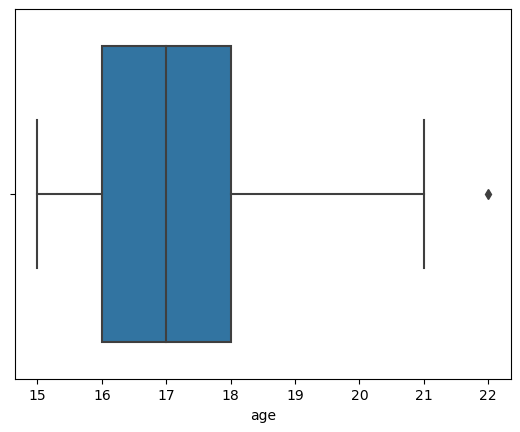

In [7]:
sns.boxplot(x='age',data=df)

Only an age of 22 is considered an anomolous result here.

<Axes: xlabel='age', ylabel='count'>

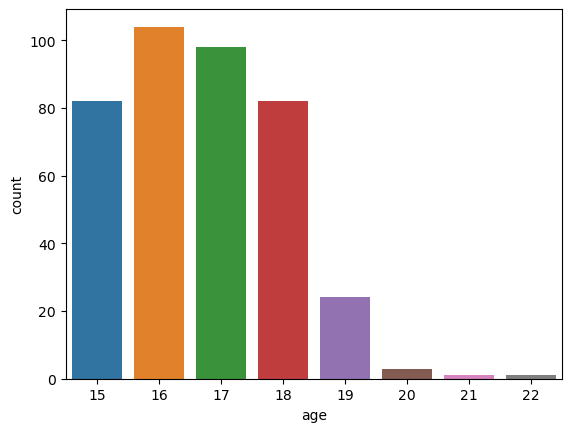

In [8]:
sns.countplot(x='age',data=df)

In [9]:
df[df['age']>19]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
306,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,0,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,17,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,course,other,2,3,2,no,yes,yes,no,no,yes,yes,yes,5,4,3,1,1,3,4,15,14,15
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7


### Absences

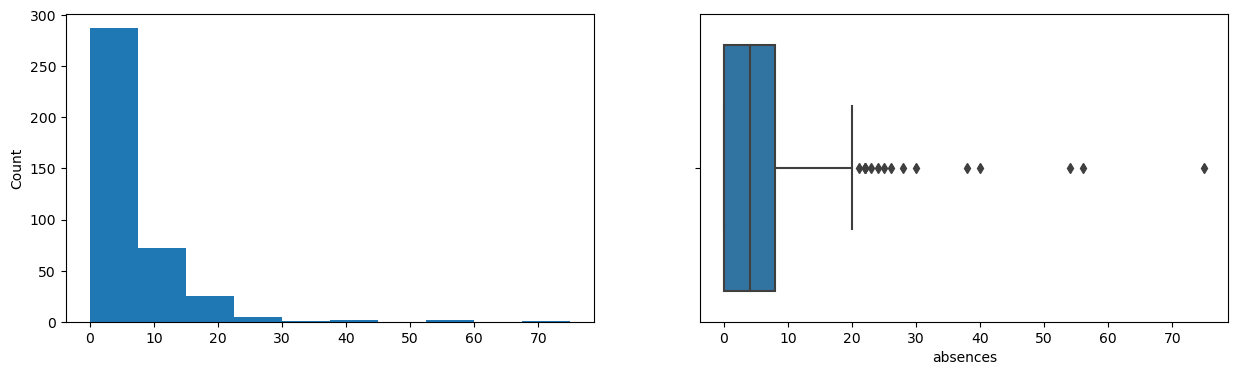

In [10]:
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
df['absences'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['absences'])

plt.show()

In [11]:
df.describe()['absences']

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

Q1 = 0, Q3 = 8

Q3 - Q1 = 8-0 = 8

8 + 3(8) = 32

Any value above 32 absences is considered an **extreme outlier**

In [12]:
df[df['absences']>32]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
307,GP,M,19,U,GT3,T,4,4,teacher,services,reputation,other,2,1,1,no,yes,yes,no,yes,yes,yes,yes,4,3,4,1,1,4,38,8,9,8
315,GP,F,19,R,GT3,T,2,3,other,other,reputation,other,1,3,1,no,no,no,no,yes,yes,yes,yes,4,1,2,1,1,3,40,13,11,11


5 students are **extreme outliers** when it comes to absences.

In [13]:
df[df['absences']>20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,home,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,no,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18
205,GP,F,17,U,GT3,T,3,4,at_home,services,home,mother,1,3,1,no,yes,yes,no,yes,yes,yes,yes,4,4,3,3,4,5,28,10,9,9
216,GP,F,17,U,GT3,T,4,3,other,other,reputation,mother,1,2,2,no,no,yes,no,yes,yes,yes,yes,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,home,father,1,2,0,no,yes,yes,no,yes,yes,yes,yes,3,1,2,1,3,2,21,17,18,18
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
277,GP,M,18,U,GT3,T,4,4,teacher,services,home,mother,2,1,0,no,no,yes,yes,yes,yes,yes,no,3,2,4,1,4,3,22,9,9,9


### Failures

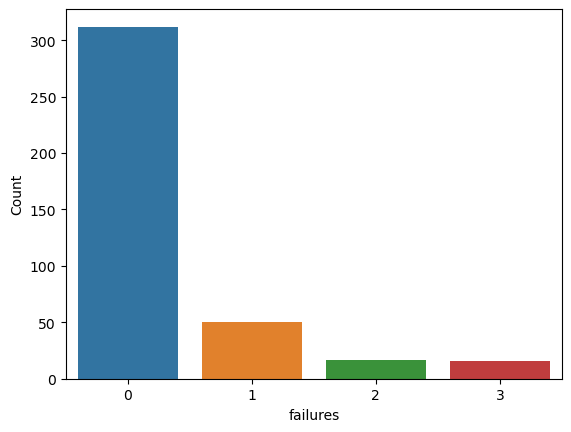

In [14]:
sns.countplot(x='failures', data=df);
plt.ylabel('Count');

Most students do not fail the class at all

Upon further consideration, failure is more of a categorical variable in nature

### G1, G2, & G3

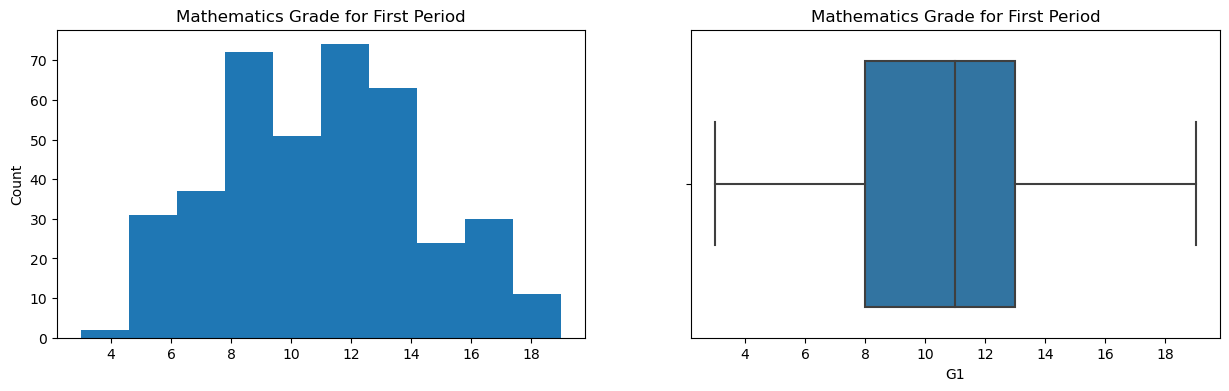

In [15]:
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
plt.title('Mathematics Grade for First Period')
df['G1'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
plt.title('Mathematics Grade for First Period')
sns.boxplot(x=df['G1'])

plt.show()

Grade Distribution for the First Period is Bimodal

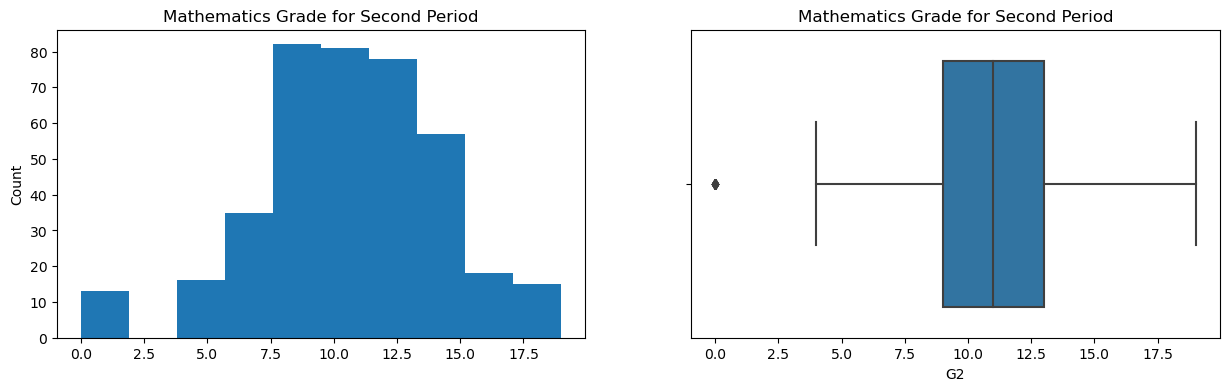

In [16]:
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
plt.title('Mathematics Grade for Second Period')
df['G2'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
plt.title('Mathematics Grade for Second Period')
sns.boxplot(x=df['G2'])

plt.show()

Grade distribution for the Second Period considers a score of 0 (obtained by ~15 students) an outlier

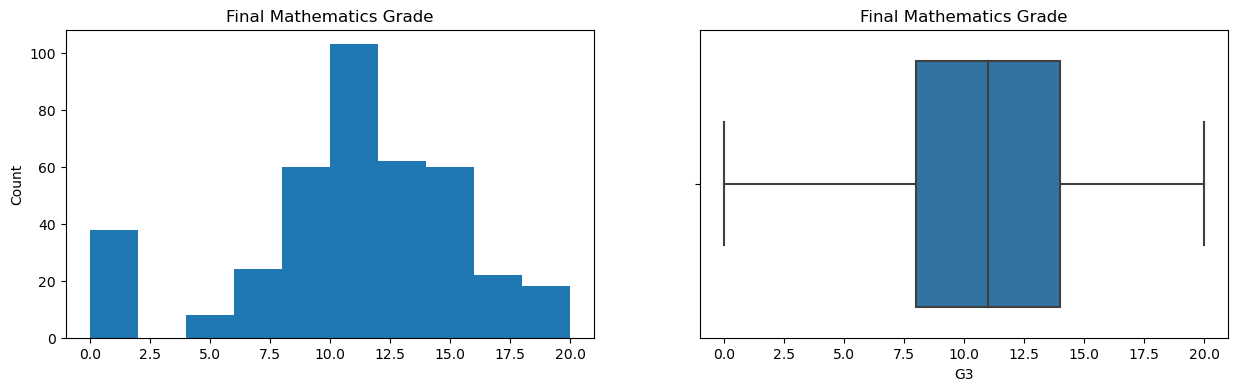

In [17]:
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
plt.title('Final Mathematics Grade')
df['G3'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
plt.title("Final Mathematics Grade")
sns.boxplot(x=df['G3'])

plt.show()

With the excpetion of ~40 students obtaining a ZERO final grade, the grade distribution appears to follow a **normal distribution pattern**

In [18]:
df.describe()[['G1','G2','G3']]

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


All test scores are slightly negatively skewed (due to frequent ZERO scores)

In [19]:
df['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

Vast majority of students are from 'Gabriel Pereira' school

### Pairplots:

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

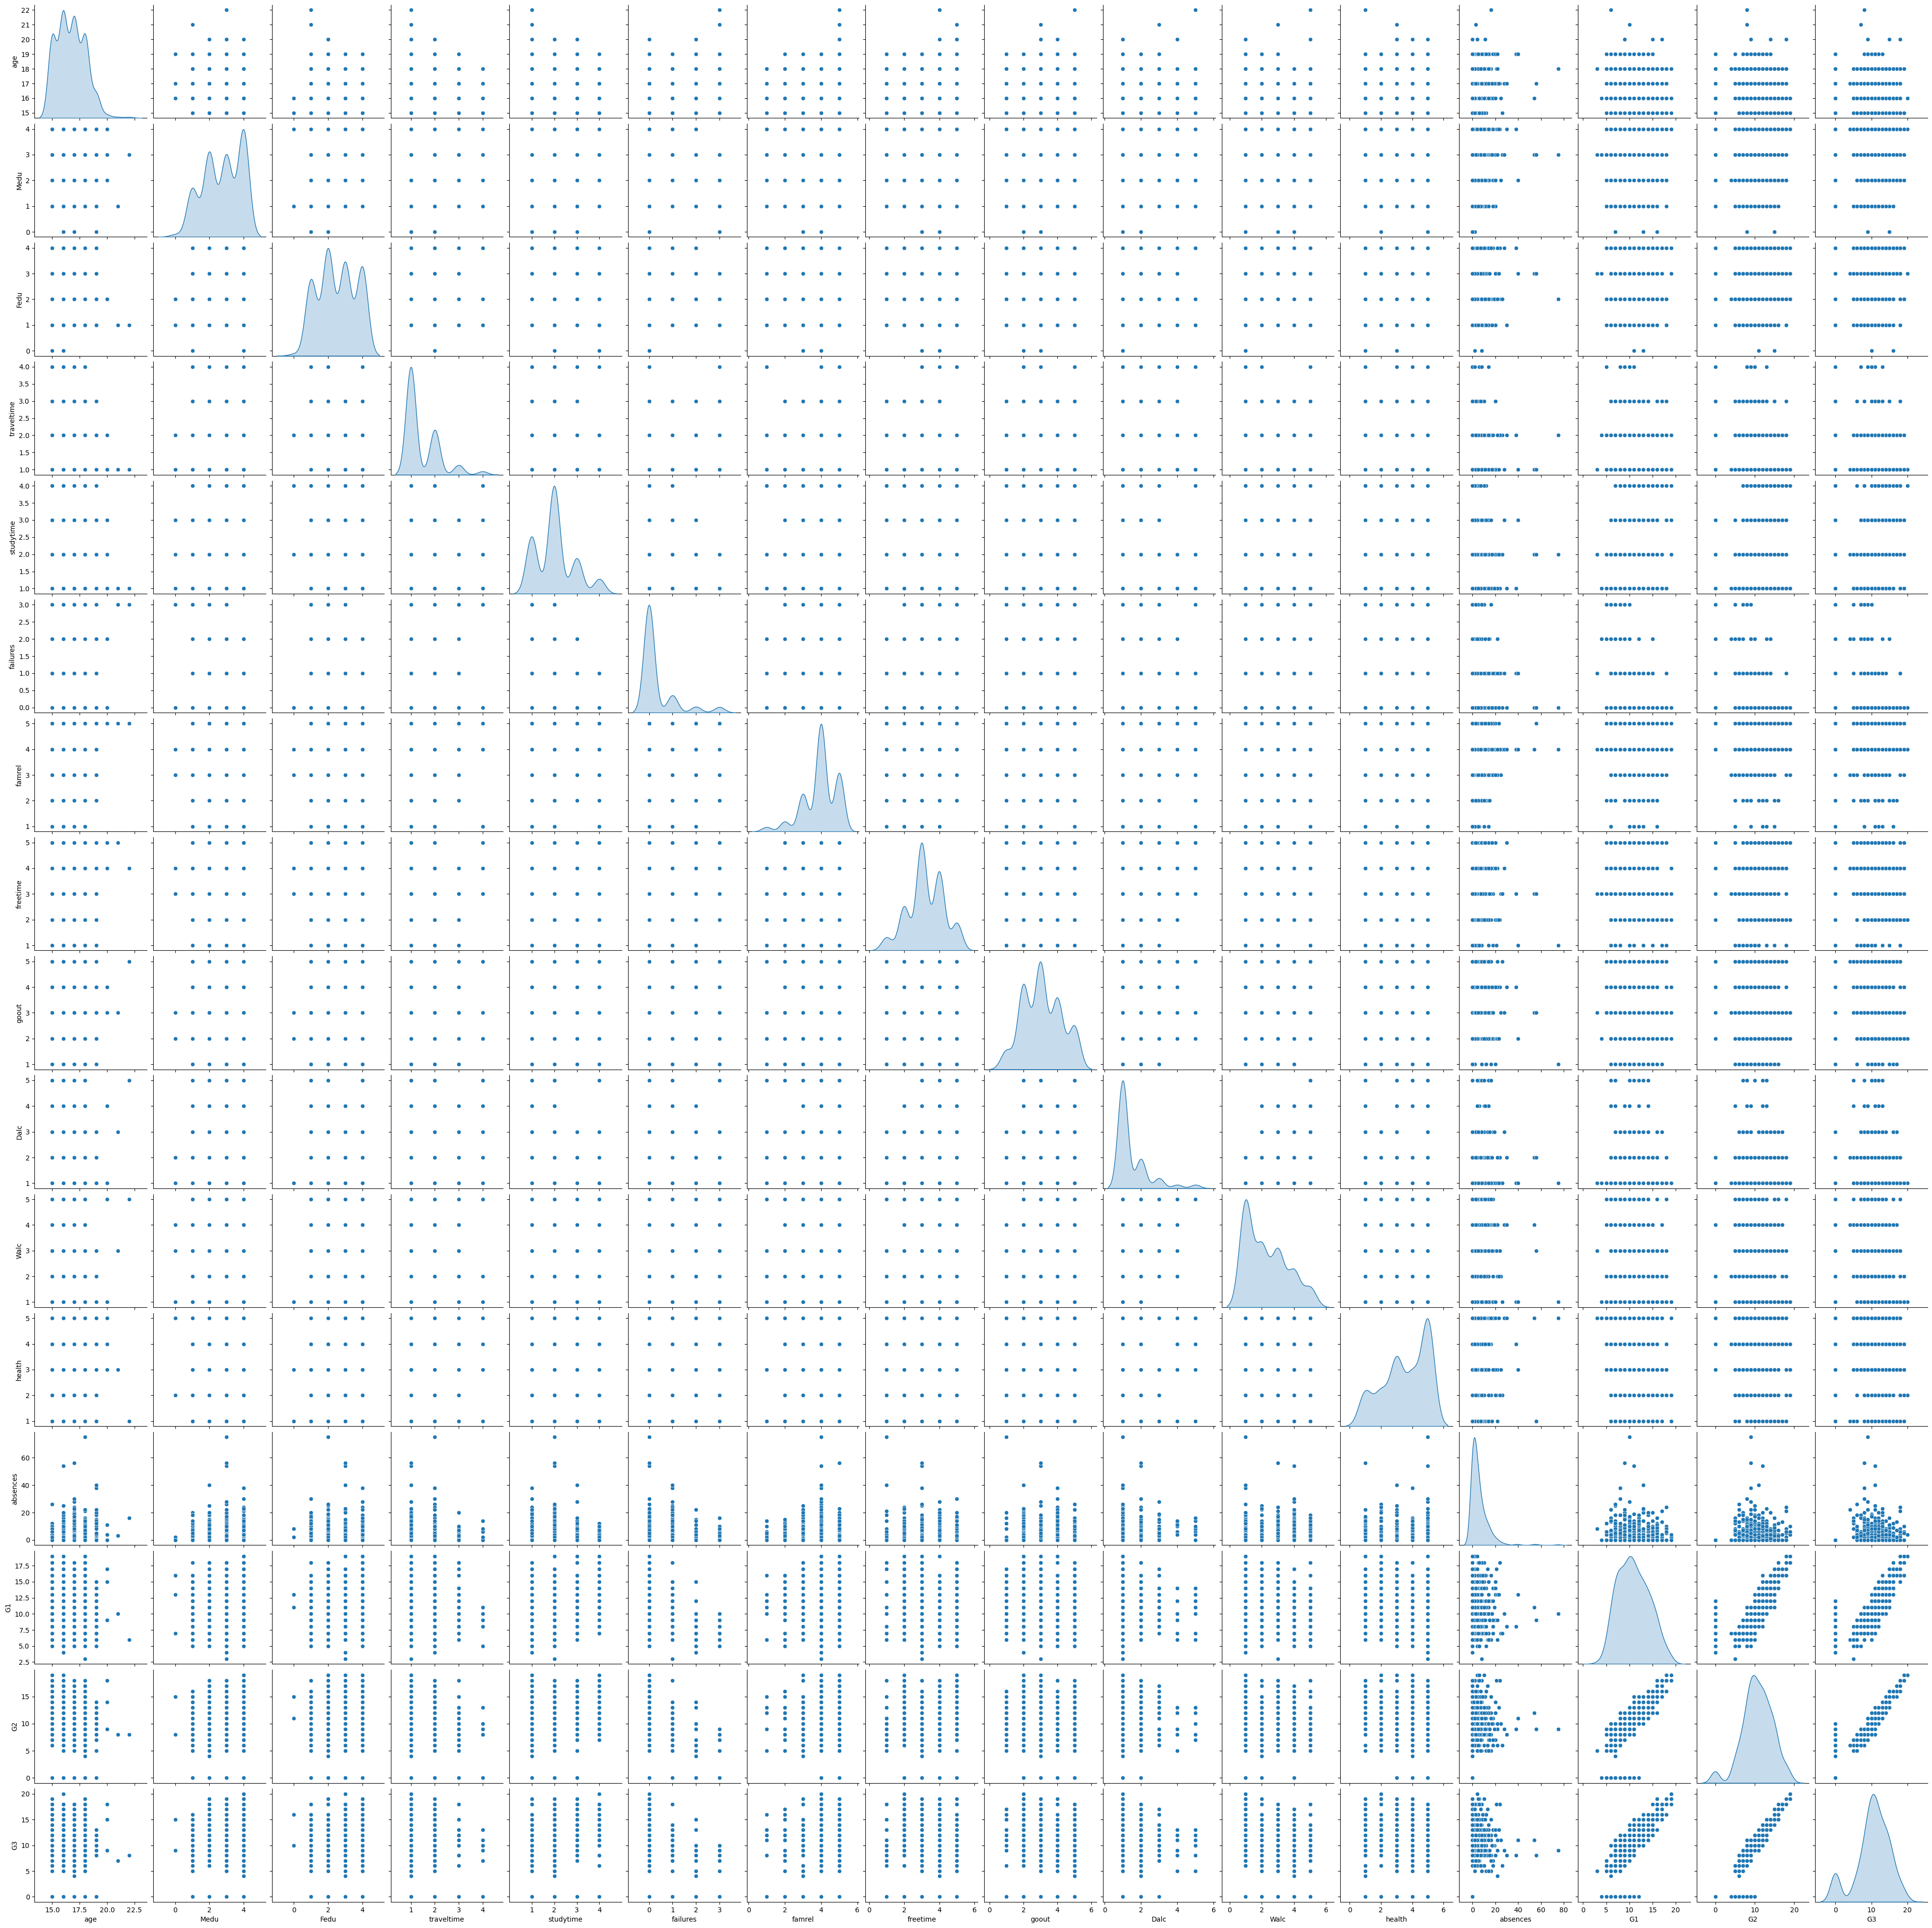

In [20]:
sns.pairplot(df, diag_kind="kde")
plt.show()

## Categorical Variables

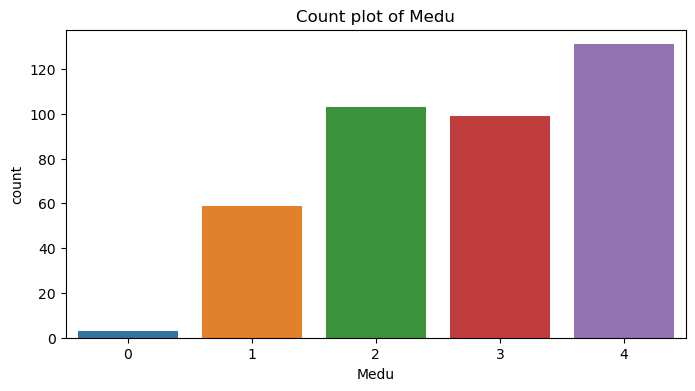

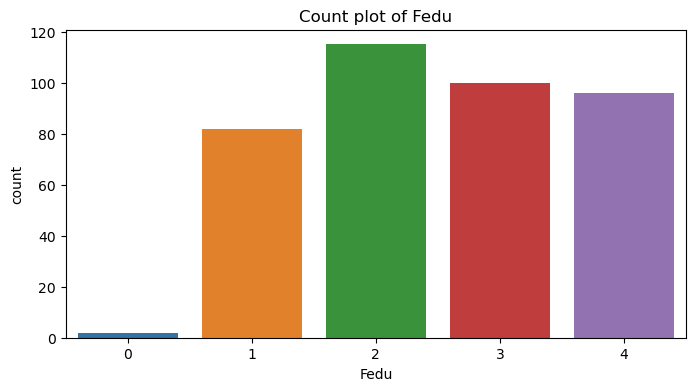

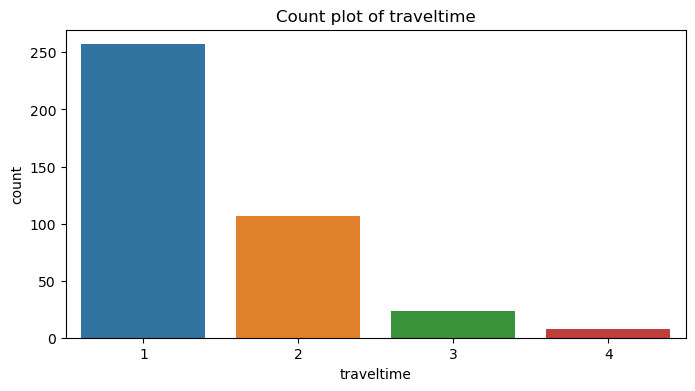

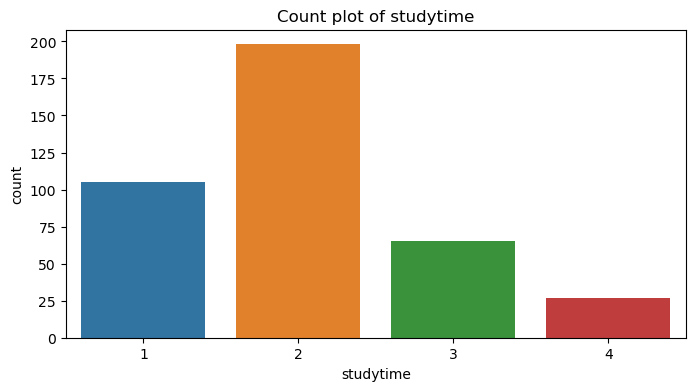

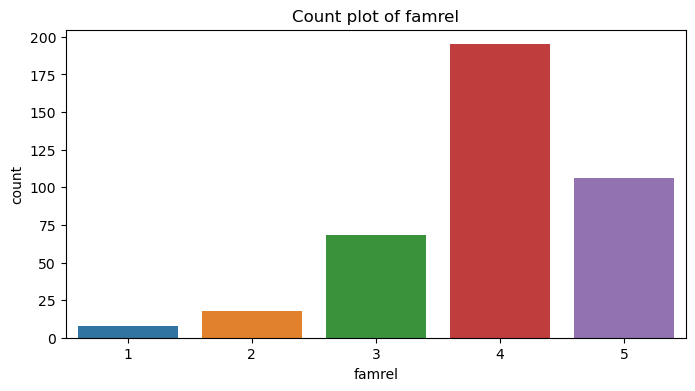

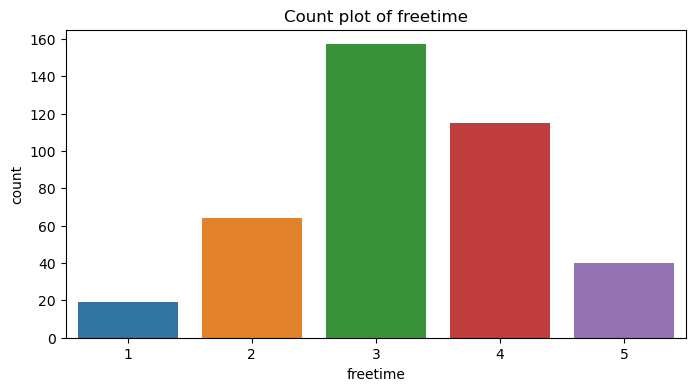

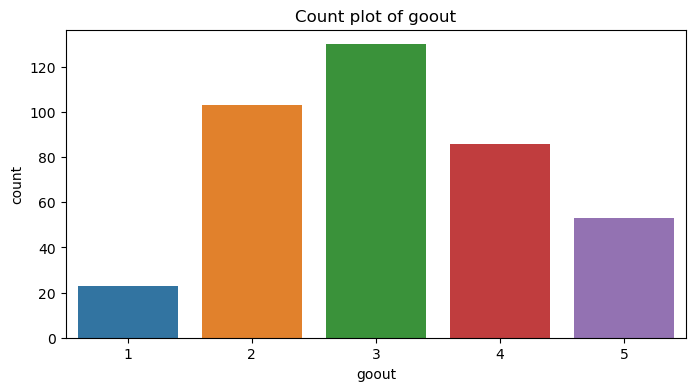

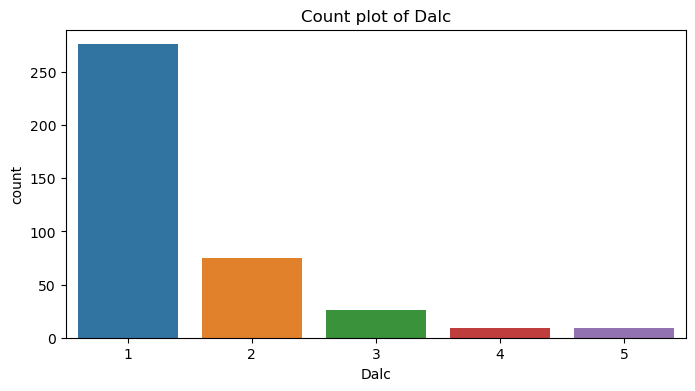

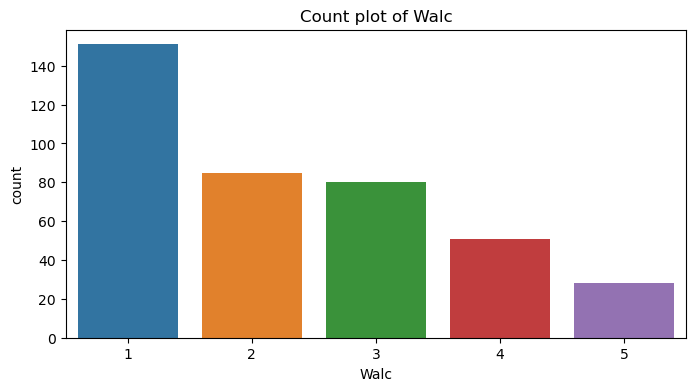

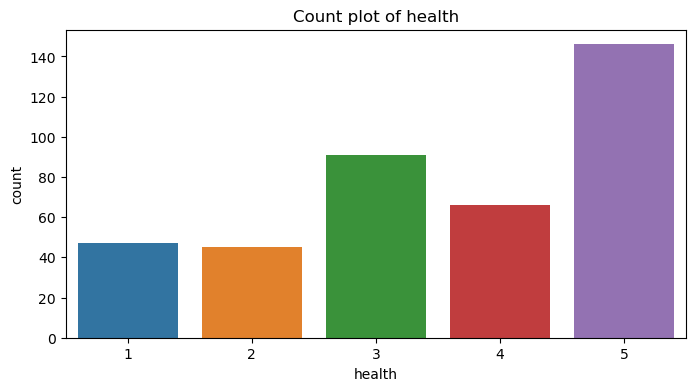

In [21]:
for i in ['Medu', "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]:
    plt.figure(figsize=(8,4));
    sns.countplot(x=i, data=df);
    plt.title(f"Count plot of {i}");

# Encoding

In [22]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6


In [23]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

All datatypes are of the correct type ✅

In [24]:
for i in df.columns:
    print(i, ":",sorted(df[i].unique()),',', len(df[i].unique()))

school : ['GP', 'MS'] , 2
sex : ['F', 'M'] , 2
age : [15, 16, 17, 18, 19, 20, 21, 22] , 8
address : ['R', 'U'] , 2
famsize : ['GT3', 'LE3'] , 2
Pstatus : ['A', 'T'] , 2
Medu : [0, 1, 2, 3, 4] , 5
Fedu : [0, 1, 2, 3, 4] , 5
Mjob : ['at_home', 'health', 'other', 'services', 'teacher'] , 5
Fjob : ['at_home', 'health', 'other', 'services', 'teacher'] , 5
reason : ['course', 'home', 'other', 'reputation'] , 4
guardian : ['father', 'mother', 'other'] , 3
traveltime : [1, 2, 3, 4] , 4
studytime : [1, 2, 3, 4] , 4
failures : [0, 1, 2, 3] , 4
schoolsup : ['no', 'yes'] , 2
famsup : ['no', 'yes'] , 2
paid : ['no', 'yes'] , 2
activities : ['no', 'yes'] , 2
nursery : ['no', 'yes'] , 2
higher : ['no', 'yes'] , 2
internet : ['no', 'yes'] , 2
romantic : ['no', 'yes'] , 2
famrel : [1, 2, 3, 4, 5] , 5
freetime : [1, 2, 3, 4, 5] , 5
goout : [1, 2, 3, 4, 5] , 5
Dalc : [1, 2, 3, 4, 5] , 5
Walc : [1, 2, 3, 4, 5] , 5
health : [1, 2, 3, 4, 5] , 5
absences : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1

## Data Summary

### Numeric Variables 
- Age (Can be considered Categorical)
- Absences
- Failures *(Can also be considered Categorical - Number of past class failures from 0 to 4)*
- G1
- G2
- **G3** (target variable)

### Categorical Variables

#### Ordinal Varaibles
- Medu *(Mother's education level on a scale from 0 to 4)*
- Fedu *(Father's education level on a scale from 0 to 4)*
- Traveltime *(Travel time from home to school on a scale from 1 to 4, increasing in time)*
- Studytime *(Weekly Study time on a scale from 1 to 4)*
- Famrel *(Quality of family relationship on a scale from 1 to 5, increasing in quality)*
- Freetime *(Free time after school on a scale from 1 to 5)*
- Goout *(How often student goes out with friends on a scale from 1 to 5)*
- Dalc *(Workday alcohol consumption on a scale from 1 to 5)*
- Walc *(Weekend alcohol consumption on a scale from 1 to 5)*
- Health *(Current health status on a scale from 1 to 5)*


#### Binary Variables
- School *(GP or MS)*
- Sex *(M or F)*
- Address *(R - rural or U - urban)*
- FamSize *(Less than 3 people or Greater than 3 people)*
- PStatus *(T - parents living together or A - parents living apart)*
- SchoolsUp *(Extra educational support or not)*
- Famsup *(Family educational supoprt or not)*
- Paid *(Extra paid courses in the subject or not)*
- Activities *(Extra curricular activities or not)*
- Nursery *(Student attended nursery or not)*
- Higher *(Want to take Higher education or not)*
- Internet *(Has internet access at home or not)*
- Romantic *(In a romantic relationship or not)*

#### Other
- Mjob *(Mother's job)*
- Fjob *(Father's job)*
- Reason *(Reason to choose the school)*
- Guardian *(Student's guardian)*

## Features to be encoded:

### Ordinal:
- Increment each value in Mjob (to get scale 1-5)
- Increment each value in Fjob (to get scale 1-5)

### Binary:
**All values to be turned into 0s and 1s**

### Other
**All values to be given a value between 1 and n inclusive** (where n is the total number of unique values in each aprticular feature)

In [25]:
binary_mapping = {
    'school': {'GP': 0, 'MS': 1},
    'sex': {'M': 0, 'F': 1},
    'address': {'R': 0, 'U': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}

for column, mapping in binary_mapping.items():
    df[column] = df[column].map(mapping)

In [26]:
categorical_columns = ['Medu', "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded[df_encoded.select_dtypes(include='bool').columns] = df_encoded.select_dtypes(include='bool').astype(int)

df_encoded.head()

,school,sex,age,address,famsize,Pstatus,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,absences,G1,G2,G3,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,traveltime_2,traveltime_3,traveltime_4,studytime_2,studytime_3,studytime_4,famrel_2,famrel_3,famrel_4,famrel_5,freetime_2,freetime_3,freetime_4,freetime_5,goout_2,goout_3,goout_4,goout_5,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,0,1,18,1,1,0,0,1,0,0,0,1,1,0,0,6,5,6,6,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,17,1,1,1,0,0,1,0,0,0,1,1,0,4,5,5,6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,15,1,0,1,3,1,0,1,0,1,1,1,0,10,7,8,10,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,0,1,15,1,1,1,0,0,1,1,1,1,1,1,1,2,15,14,15,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,16,1,1,1,0,0,1,1,0,1,1,0,0,4,6,10,10,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [27]:
df_encoded.dtypes.value_counts()

int64    70
Name: count, dtype: int64

All variables are now of type int64 ✅

## Correlations:

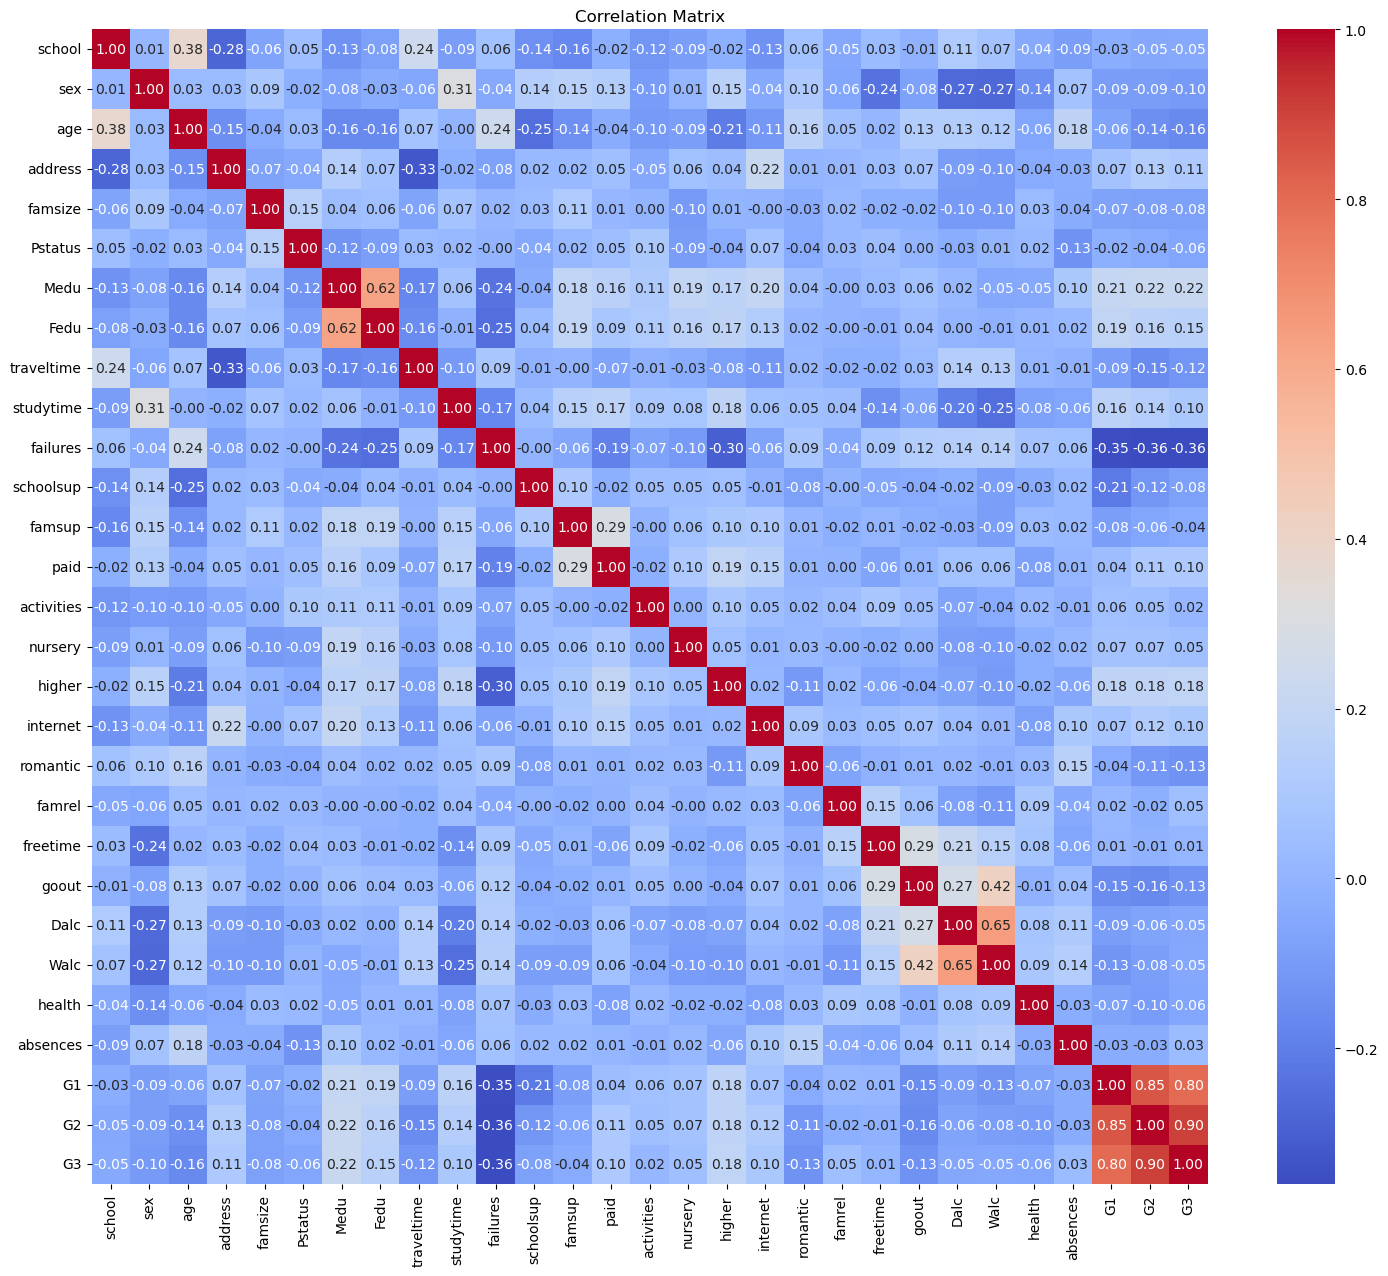

In [28]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')

# Visualize the correlation matrix
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Note to Self:
It is generally okay to include **categorical variables that have been mapped to numerical values** in a correlation matrix, but there are a few important considerations:

**Ordinal Variables**: If variables have an inherent order (e.g., education level: high school < college < graduate), then mapping them to numerical values *is appropriate*

**Binary Variables**: For binary categorical variables (e.g. sex (M/F)) it is also acceptable to map them to 0s and 1s

***HOWEVER***, when it comes to *nominal* variables (no inherent order, e.g., color) mapping them to numbers **can be misleading** since these categories are **simply labels** without a true numerical meaning

Using a correlation matrix is **not the most robust/comprehensive method** for **detecting multicollinearity**, however it is a good starting point, here are two methods that can be used instead:

1. Variance Inflation Factor (VIF):
2. PCA

## Analyzing more distributions:

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


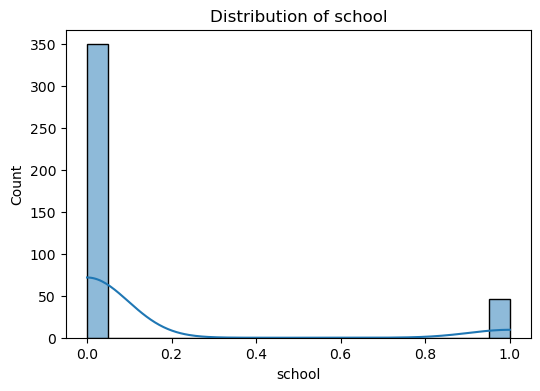

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


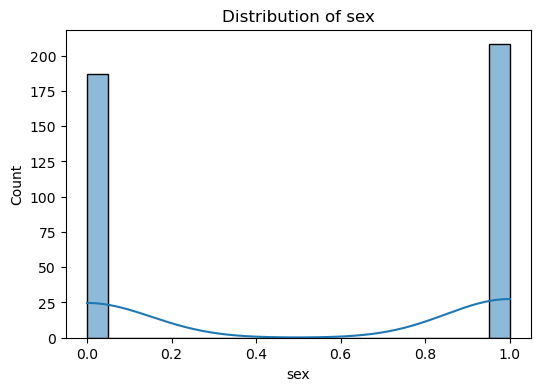

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


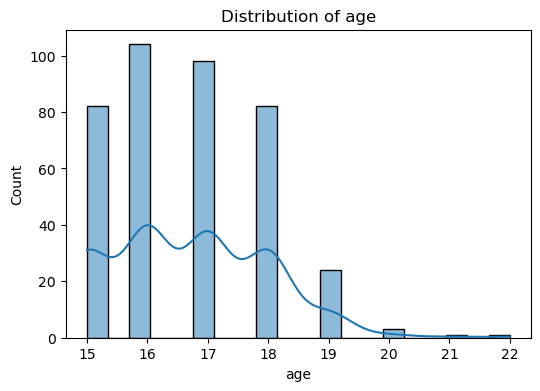

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


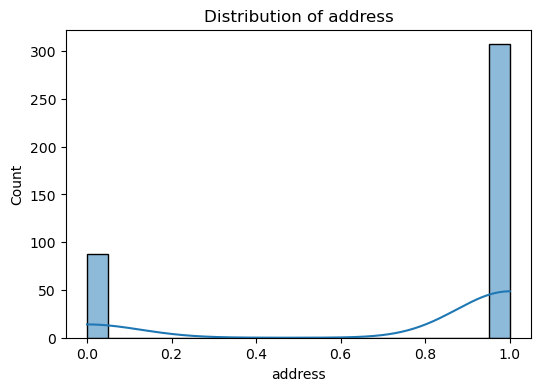

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


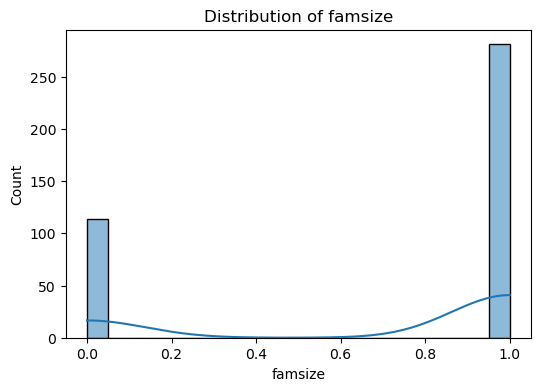

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


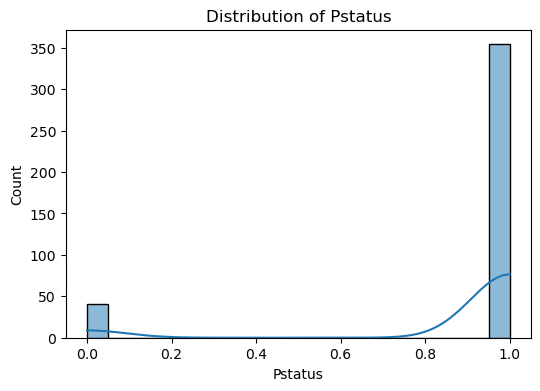

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


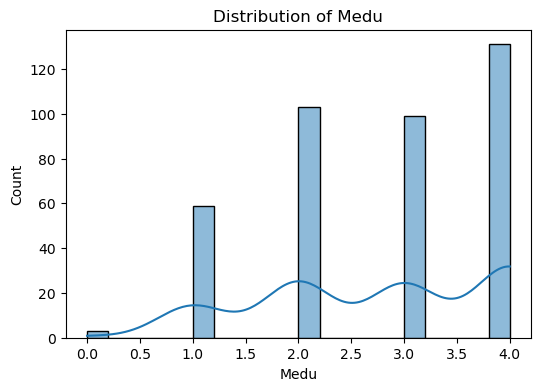

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


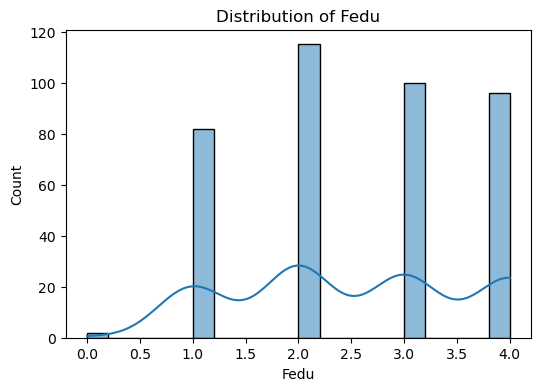

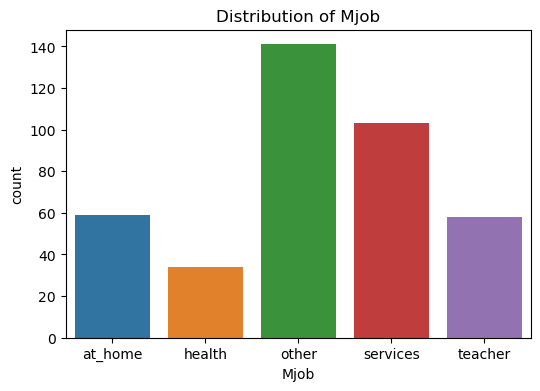

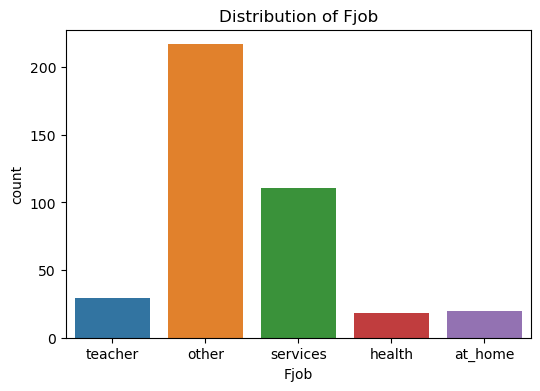

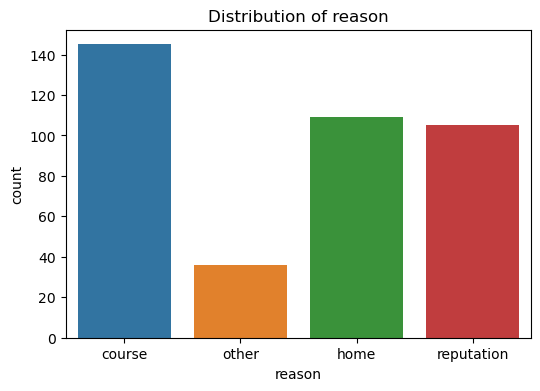

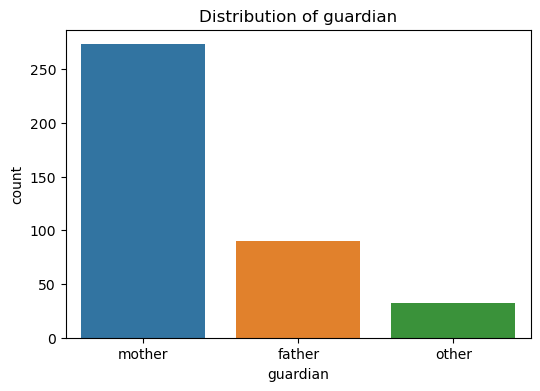

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


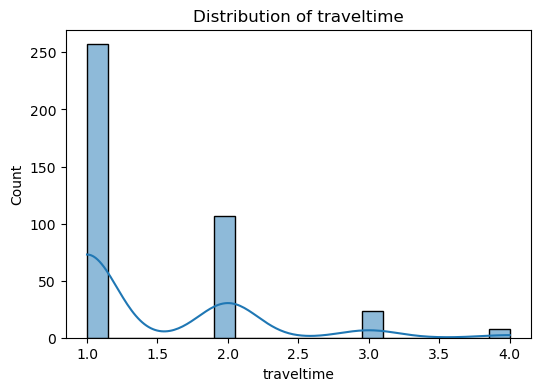

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


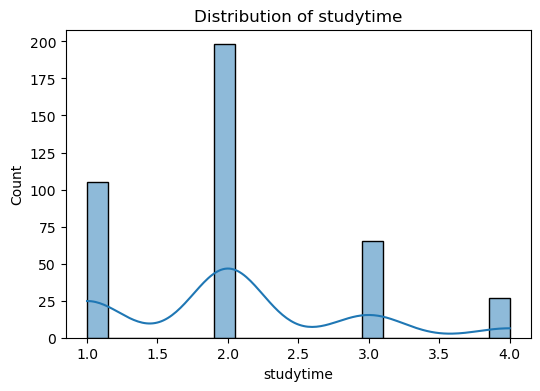

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


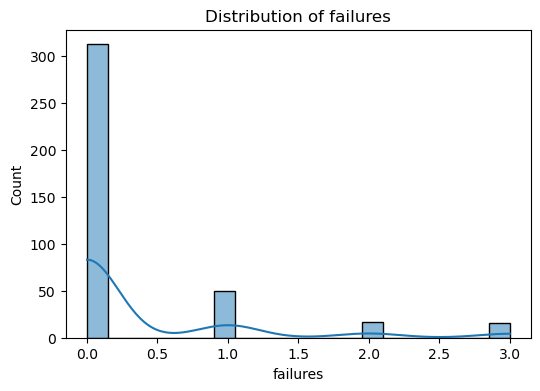

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


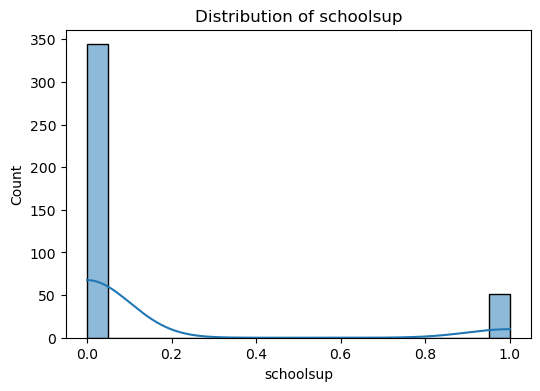

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


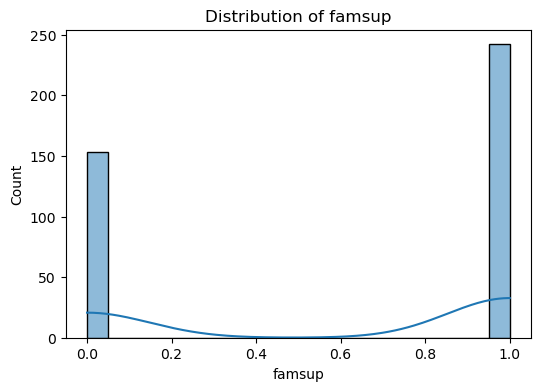

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


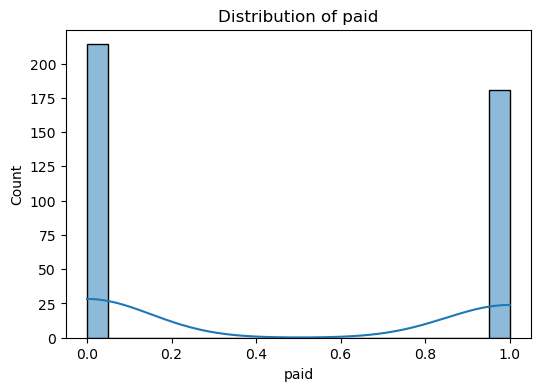

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


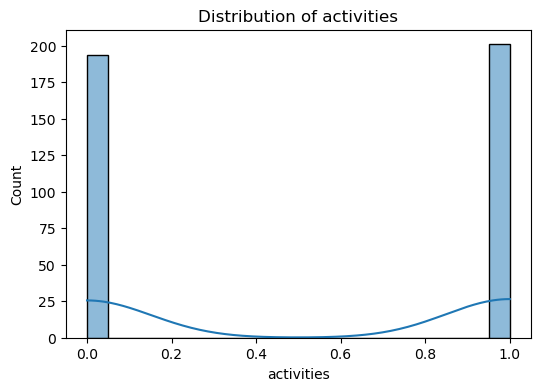

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


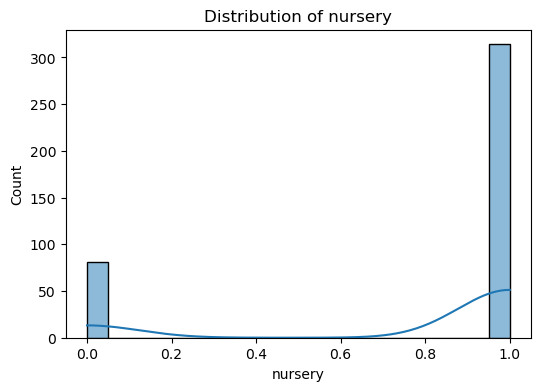

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


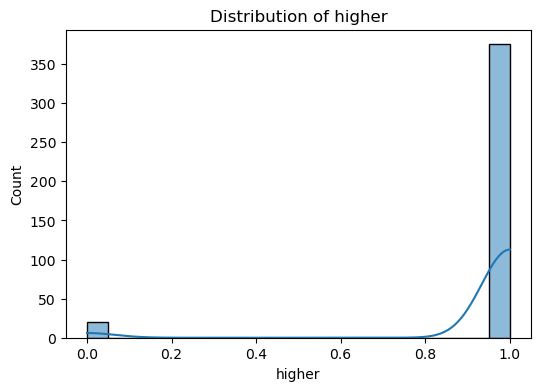

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


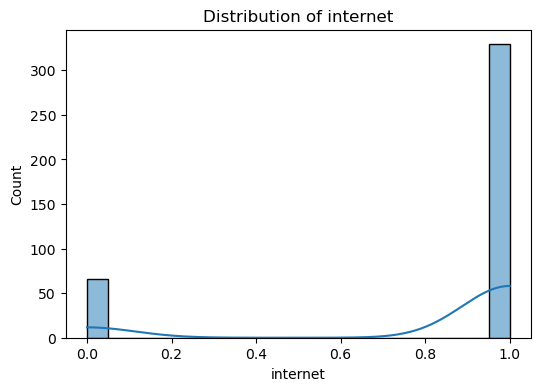

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


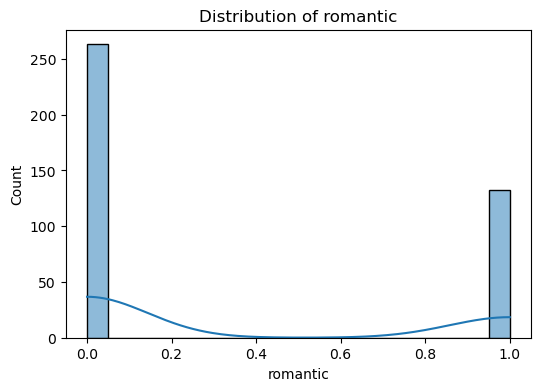

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


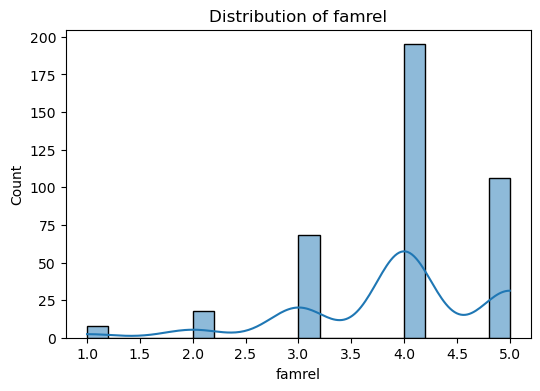

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


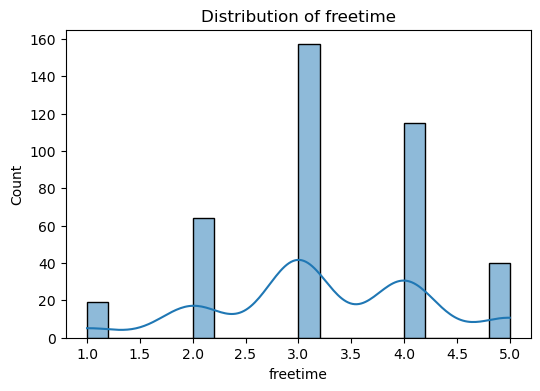

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


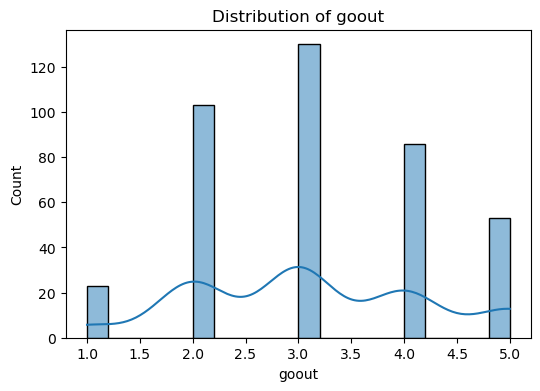

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


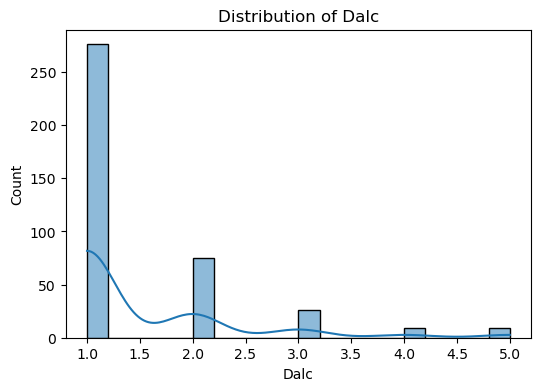

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


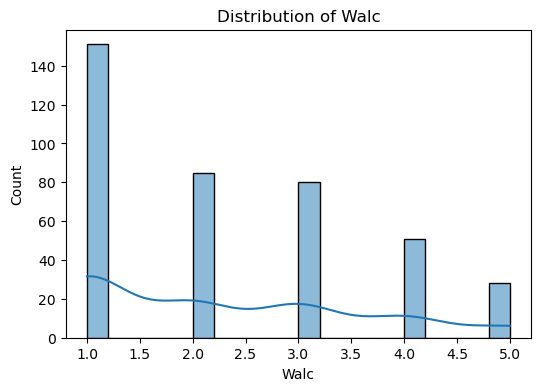

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


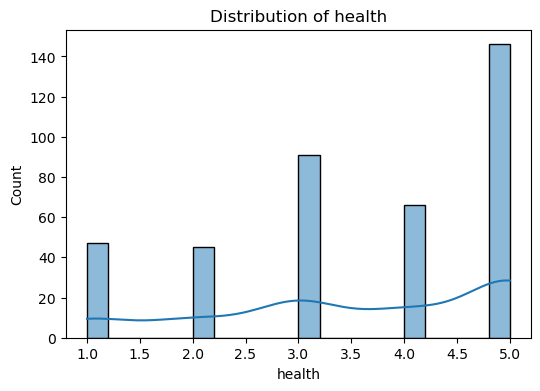

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


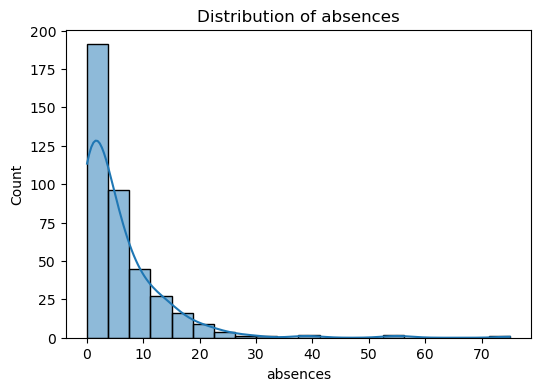

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


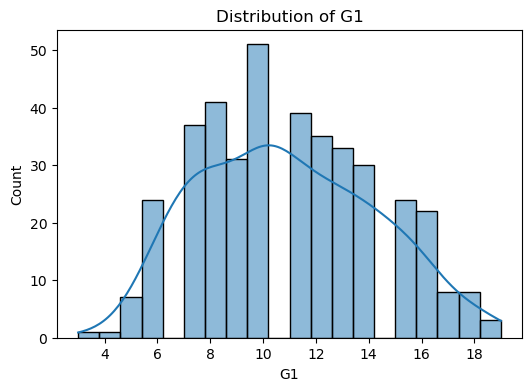

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


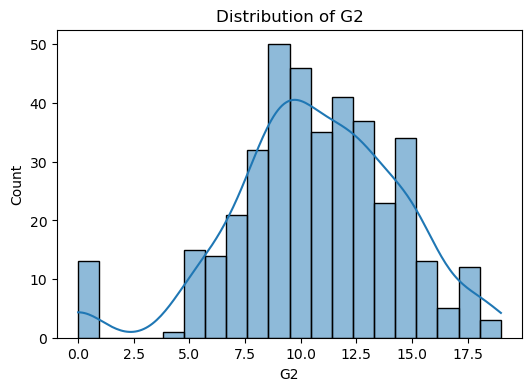

/Users/kareem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


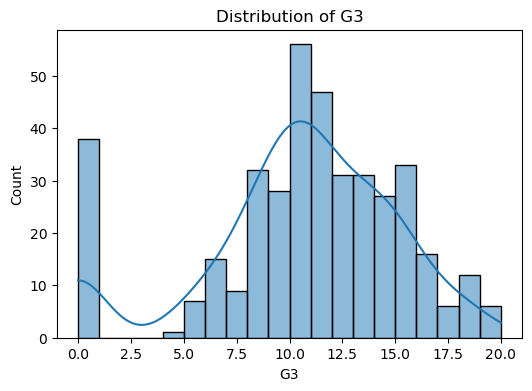

In [29]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True, bins=20)
    else:
        sns.countplot(x=df[column])
    plt.title(f"Distribution of {column}")
    plt.show()

In [30]:
#sns.pairplot(df, diag_kind="kde")
#plt.show()

Very ugly plot + took around 3 mins to generate, consider doing this before mapping binary variables to 0s and 1s 

In [31]:
target = 'G3'
X = df.drop(columns=[target])
y = df[target]

In [32]:
from scipy.stats import f_oneway
from sklearn.feature_selection import f_classif

for col in categorical_columns:
    groups = [y[X[col] == value] for value in X[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"Feature: {col}, F-statistic: {f_stat}, P-value: {p_value}")

Feature: Medu, F-statistic: 6.088435990706152, P-value: 9.241876816630144e-05
Feature: Fedu, F-statistic: 2.8905556373915777, P-value: 0.0221972905719672
Feature: Mjob, F-statistic: 3.7544596189013513, P-value: 0.005194749939407733
Feature: Fjob, F-statistic: 1.3029154881291376, P-value: 0.2683141692179647
Feature: reason, F-statistic: 2.0799920508343344, P-value: 0.10233745609730385
Feature: guardian, F-statistic: 1.5905172045230977, P-value: 0.2051326420058259
Feature: traveltime, F-statistic: 1.8397512190059848, P-value: 0.13937884626846256
Feature: studytime, F-statistic: 1.7278351054436039, P-value: 0.1607228096836598
Feature: famrel, F-statistic: 0.3974329754209522, P-value: 0.8104874341858186
Feature: freetime, F-statistic: 2.2245187381855573, P-value: 0.06574414402506515
Feature: goout, F-statistic: 3.1512156349464284, P-value: 0.014380078895198916
Feature: Dalc, F-statistic: 1.5836045063367645, P-value: 0.17786362227119418
Feature: Walc, F-statistic: 0.7331623695637165, P-valu

In [33]:
from sklearn.feature_selection import f_classif

# Filter numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Perform F-Test
f_scores, p_values = f_classif(X[numerical_cols], y)

# Display results
for col, f_score, p_value in zip(numerical_cols, f_scores, p_values):
    print(f"Feature: {col}, F-score: {f_score}, P-value: {p_value}")

Feature: school, F-score: 0.6751156054987559, P-value: 0.8277720976075096
Feature: sex, F-score: 1.1886632362573588, P-value: 0.2705325004545239
Feature: age, F-score: 1.3974325757283503, P-value: 0.13390861511378885
Feature: address, F-score: 1.586766670932534, P-value: 0.06473360450806481
Feature: famsize, F-score: 1.0263481848211484, P-value: 0.42807300407263194
Feature: Pstatus, F-score: 0.9658531139912799, P-value: 0.49642543272933726
Feature: Medu, F-score: 1.9521090584727423, P-value: 0.013293842838458313
Feature: Fedu, F-score: 1.3173894989879937, P-value: 0.17772428632218987
Feature: traveltime, F-score: 1.1931293981946163, P-value: 0.2668260438385259
Feature: studytime, F-score: 1.0621867149045205, P-value: 0.3897158255809407
Feature: failures, F-score: 6.115357817389258, P-value: 1.3461123075822662e-12
Feature: schoolsup, F-score: 1.9894003877798165, P-value: 0.011189872190693674
Feature: famsup, F-score: 0.7963052236345283, P-value: 0.6977904554242049
Feature: paid, F-score

In [34]:
selected_features = [col for col, p_value in zip(numerical_cols, p_values) if p_value < 0.05]
print("Selected Features:", selected_features)

Selected Features: ['Medu', 'failures', 'schoolsup', 'paid', 'romantic', 'Dalc', 'Walc', 'absences', 'G1', 'G2']
